In [139]:
import pandas as pd

In [140]:
import numpy as np

In [141]:
import matplotlib.pyplot as plt

In [142]:
med_readmis = 'C:/Users/grace/OneDrive/Desktop/D207/medical_data_D207.csv'

In [143]:
med_df = pd.read_csv(med_readmis)

In [144]:
med_df.shape

(10000, 50)

In [145]:
print(med_df.head())

   CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  TotalCharge Additional_charges Item1 Item2  Item3  \
0  34.34960 -86.72508  ...  3726.702860  

In [146]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [147]:
from scipy import stats

In [149]:
#Configure readmission value counts ratio
readmis_ratio = med_df['ReAdmis'].value_counts()
areas_ratio = med_df['Area'].value_counts()

print(readmis_ratio, areas_ratio)

No     6331
Yes    3669
Name: ReAdmis, dtype: int64 Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64


In [150]:
#Create contingency table
data_crosstab = pd.crosstab(med_df['Area'], med_df['ReAdmis'], margins=True, margins_name="Total")

In [151]:
#Significance level
alpha = 0.05

In [152]:
#Calculation of Chisquare test statistic
chi_square = 0
rows = med_df['Area'].unique()
columns = med_df['ReAdmis'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [153]:
#The p-value approach
print("The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 0.7133125620168337  and p value is: 0.6128241714683622
Failed to reject the null hypothesis.


In [154]:
#Calculate the quartiles of Age
print(np.quantile(med_df['Age'], [0, 0.25, 0.5, 0.75, 1]))

[18. 36. 53. 71. 89.]


<AxesSubplot:>

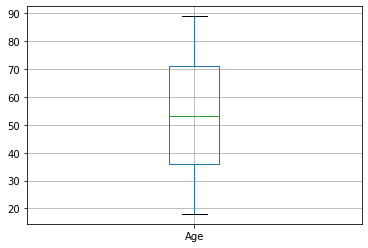

In [155]:
#Create Box Plot to visually represent the distribution of Age
med_df.boxplot(column = ['Age'])

In [156]:
#Calculate the quartiles of Income
print(np.quantile(med_df['Income'], [0, 0.25, 0.5, 0.75, 1]))

[1.54080000e+02 1.95987750e+04 3.37684200e+04 5.42964025e+04
 2.07249100e+05]


<AxesSubplot:>

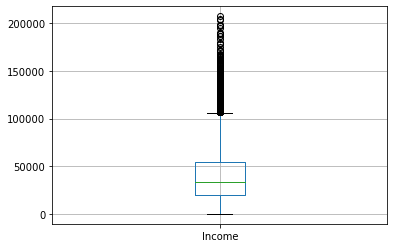

In [157]:
#Create Box Plot to visually represent the distribution of Income
med_df.boxplot(column = ['Income'])

In [158]:
#Find frequency of each marital status
pd.crosstab(index=med_df['Marital'], columns='count')

col_0,count
Marital,
Divorced,1961
Married,2023
Never Married,1984
Separated,1987
Widowed,2045


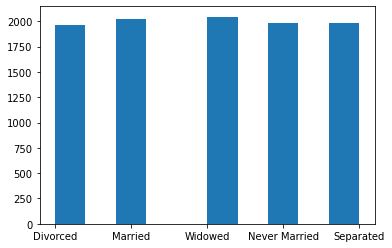

In [159]:
#Create histogram to show frequency distribution of each marital status
plt.hist(med_df['Marital'])
plt.show()

In [160]:
#Find frequency of each gender
pd.crosstab(index=med_df['Gender'], columns='count')

col_0,count
Gender,
Female,5018
Male,4768
Nonbinary,214


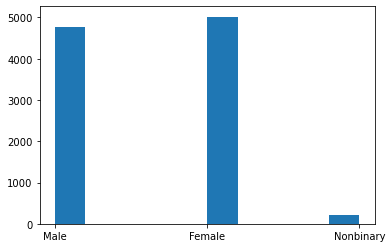

In [161]:
#Create histogram to show frequency distribution of each gender specified
plt.hist(med_df['Gender'])
plt.show()

In [162]:
#Print variance and sd of Income for each Marital status
print(med_df.groupby('Marital')['Income'].agg([np.var, np.std]))

                        var           std
Marital                                  
Divorced       8.750829e+08  29581.799691
Married        8.171095e+08  28585.127379
Never Married  8.182316e+08  28604.747602
Separated      7.826233e+08  27975.404799
Widowed        7.758870e+08  27854.747824


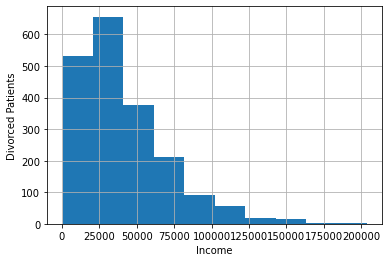

In [163]:
#Create a histogram of Income for Martial status 'Divorced'
med_df[med_df['Marital'] == 'Divorced']['Income'].hist()
plt.xlabel('Income')
plt.ylabel('Divorced Patients')
plt.show()

In [164]:
#Print variance and sd of Age for each Gender
print(med_df.groupby('Gender')['Age'].agg([np.var, np.std]))

                  var        std
Gender                          
Female     424.189726  20.595867
Male       427.130031  20.667124
Nonbinary  439.637423  20.967533


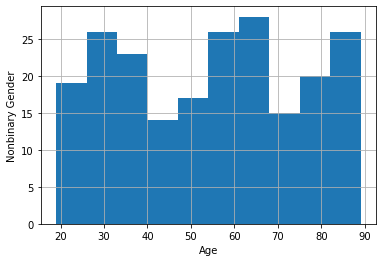

In [165]:
#Create a histogram of Age for Gender specified as 'Nonbinary'
med_df[med_df['Gender'] == 'Nonbinary']['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Nonbinary Gender')
plt.show()